In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dt =  pd.read_excel("Data/SourceData.xlsx")

In [ ]:
dt

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
dt.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


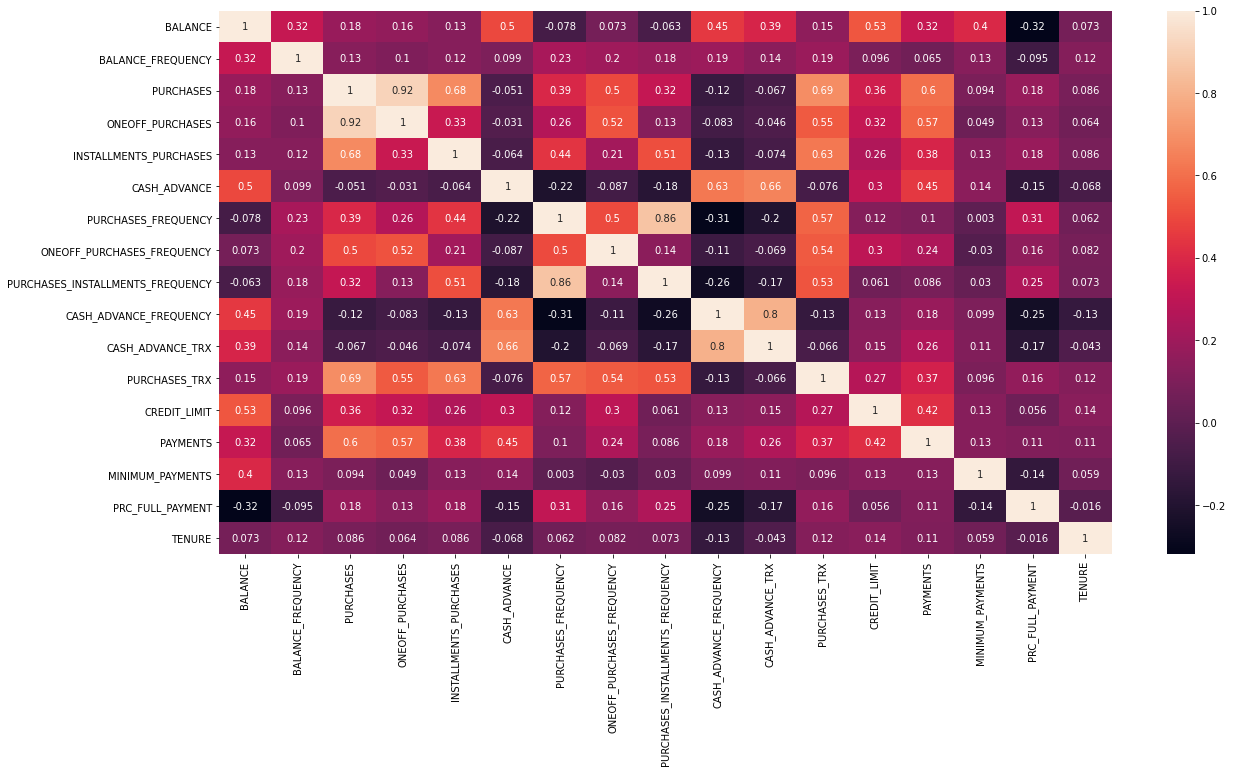

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.heatmap(dt.corr(), annot=True, ax= ax)
# correlation map shows some obvious relations

In [ ]:
dt.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

From the above results, we have 2 columns which have missing values:


1.   CREDIT_LIMIT
2.   MINIMUM_PAYMENTS

In [ ]:
dt[dt['CREDIT_LIMIT'].isnull() == True]
#C15349
# Index = 5203

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Dropping the above row with index 5203 as NaN value in Credit Limit which is the limit of spending for credit card user seems irrelevant. A credit card user must have credit limit. It seems that data is missing here, hence we are dropping this record.

In [7]:
dt.drop(index = 5203, axis = 0, inplace = True)

In [13]:
dt[dt['MINIMUM_PAYMENTS'].isnull() == True]['MINIMUM_PAYMENTS']

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

There 313 records in this field which have missing values. Minimum Payments refers to minimum amount of payment that has been made by a user.

To fill these missing values we can use frequency of occurance of a value but that would be good in the case when the data is categorical. This is a continuous data and hence we will either go ahead with mean or median whichever is less.

From the below results median seems to be a lower value which is 312.452292. Hence, we gonna replace the nan values by median

In [34]:
dt['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [37]:
# dropping the cust id column as it will not be used in the model
dt.drop(labels='CUST_ID', axis = 1, inplace = True)

# replacing the missing values with median value
dt = dt.apply(lambda x: x.fillna(x.median()))

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [42]:
ip_features = dt.values

In [43]:
ip_features = StandardScaler().fit_transform(ip_features)

In [49]:
k_values = []
k_inertia = []
k_sh_score = []

for k in range(2,20):
    k_values.append(k)
    
    kmeans=KMeans(n_clusters=k, n_init=50)
    
    kmeans.fit(ip_features)
    
    k_inertia.append(kmeans.inertia_)
    k_sh_score.append(silhouette_score(ip_features,kmeans.labels_))

Text(0, 0.5, 'Silhouette Scores')

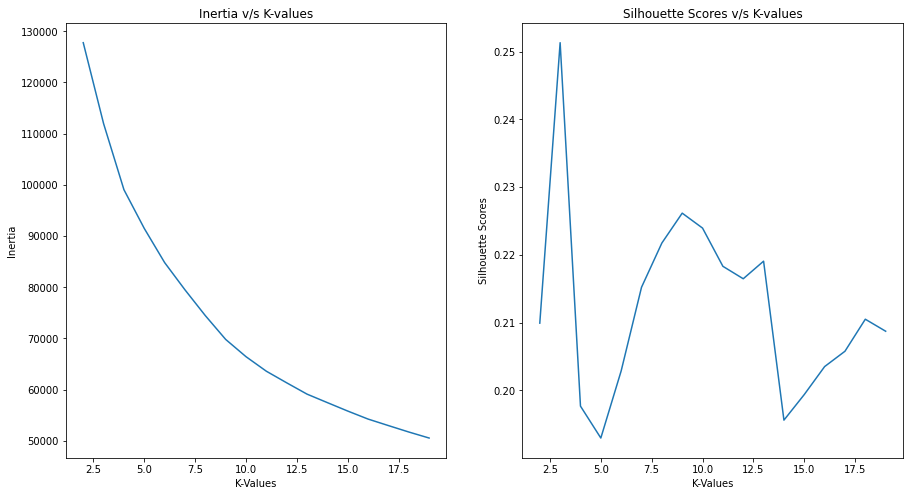

In [50]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].plot(k_values, k_inertia)
ax[0].set_title("Inertia v/s K-values")
ax[0].set_xlabel("K-Values")
ax[0].set_ylabel("Inertia")

ax[1].plot(k_values, k_sh_score)
ax[1].set_title("Silhouette Scores v/s K-values")
ax[1].set_xlabel("K-Values")
ax[1].set_ylabel("Silhouette Scores")

Inertia (which sum of sq. distance of points from centroid) should be minimum and it is visible from the inertia plot that after 8th or 9th cluster, the decrease in inertia is less.

Silhouette Score which refers to closeness of points of one cluster with the points of another cluster. Values ranges from [-1 to 1], where 1 means that clusters are far apart and 0 means clusters are very close to the decision boundary. It is desired to keep silhouette score close to 1, hence in 8 or 9 clusters that highest value we are getting is 0.227

Therefore, we will train our model with 9 clusters.


In [69]:
dt_train, dt_test = train_test_split(dt, test_size = 0.2)

In [70]:
sc = StandardScaler()
x_train = sc.fit_transform(dt_train.values)
x_test = sc.transform(dt_test.values)

In [71]:
kmeans=KMeans(n_clusters=9, n_init=50)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
dt_test['CLUSTER'] = kmeans.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
dt_test.groupby('CLUSTER').mean()[['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY','CREDIT_LIMIT', 'ONEOFF_PURCHASES_FREQUENCY',
                                   'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','PAYMENTS']]

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,ONEOFF_PURCHASES_FREQUENCY,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PAYMENTS
CLUSTER,,,,,,,,
0,105.626036,303.316266,0.256678,3718.359561,0.066517,178.891315,0.227545,1151.492416
1,1597.320362,229.424802,0.161772,3531.379962,0.087200,659.154522,0.018512,1079.218455
2,1394.744225,2119.425566,0.881417,5889.819005,0.773718,529.812837,0.277903,2088.701178
3,831.590544,362.784651,0.392162,2382.945736,0.109681,322.737922,0.152178,643.346934
4,4448.961185,506.792043,0.285733,7695.161290,0.127371,1506.950885,0.054874,4268.806233
5,4594.323632,25775.282000,0.900000,16800.000000,0.733333,1549.493836,0.300000,24659.707269
6,4533.300423,973.215714,0.380411,4653.571429,0.036797,25583.351430,0.000000,1819.275256
7,3644.245505,6109.932308,0.964286,9128.571429,0.648352,1891.173506,0.196603,6119.369546
8,757.360644,937.381204,0.877515,3403.534031,0.093594,527.373208,0.253982,1082.887028
